# Analiza podatkov največjih bank 

Na spletni strani https://companiesmarketcap.com/banks/largest-banks-by-market-cap/ lahko najdemo seznam največji oz. najbogatejših bank glede na tržno kapitalizacijo (tržna kapitalizacija je zmnožek vsega števila delnic podjetja s ceno posamezne delnice).

## Proučevanje podatkov

In [1]:
import pandas

%matplotlib inline

banke = pandas.read_csv("banke.csv")

In [2]:
banke

,Mesto,Naziv,Šifra podjetja,Država,Tržna kapitalizacija (milijarde $),Cena na delnico ($)
0,1,JPMorgan Chase,JPM,USA,432.61000,148.860
1,2,Bank of America,BAC,USA,229.42000,28.840
2,3,ICBC,1398.HK,China,194.45000,0.430
3,4,Agricultural Bank of China,601288.SS,China,160.58000,0.470
4,5,HDFC Bank,HDB,India,158.94000,63.260
...,...,...,...,...,...,...
537,538,Silvergate Capital,SI,USA,0.03957,1.250
538,539,Carver Bancorp,CARV,USA,0.01188,2.430
539,540,Signature Bank,SBNY,USA,0.00207,0.033
540,541,Sberbank,SBER.ME,Russia,0.00000,1.950


### Vrednost bank in delnic

Banke so primarno zapisane v vrstnem redu od največje do najmanjše tržne kapitalizacije (v primeru zadnjih dveh bank sta kapitalizaciji enaki 0, saj podatkov o vrednostih ni na strani).

Poglejmo si še, katere banke imajo najvišje cene posameznih delnic.

In [3]:
banke.sort_values("Cena na delnico ($)", ascending=False)
banke

,Mesto,Naziv,Šifra podjetja,Država,Tržna kapitalizacija (milijarde $),Cena na delnico ($)
0,1,JPMorgan Chase,JPM,USA,432.61000,148.860
1,2,Bank of America,BAC,USA,229.42000,28.840
2,3,ICBC,1398.HK,China,194.45000,0.430
3,4,Agricultural Bank of China,601288.SS,China,160.58000,0.470
4,5,HDFC Bank,HDB,India,158.94000,63.260
...,...,...,...,...,...,...
537,538,Silvergate Capital,SI,USA,0.03957,1.250
538,539,Carver Bancorp,CARV,USA,0.01188,2.430
539,540,Signature Bank,SBNY,USA,0.00207,0.033
540,541,Sberbank,SBER.ME,Russia,0.00000,1.950


Katere delnice so najdražje?

In [4]:
banke.head(10)

,Mesto,Naziv,Šifra podjetja,Država,Tržna kapitalizacija (milijarde $),Cena na delnico ($)
0,1,JPMorgan Chase,JPM,USA,432.61,148.86
1,2,Bank of America,BAC,USA,229.42,28.84
2,3,ICBC,1398.HK,China,194.45,0.43
3,4,Agricultural Bank of China,601288.SS,China,160.58,0.47
4,5,HDFC Bank,HDB,India,158.94,63.26
5,6,Wells Fargo,WFC,USA,154.57,42.14
6,7,HSBC,HSBC,UK,148.72,37.62
7,8,China Construction Bank,601939.SS,China,139.74,0.81
8,9,Morgan Stanley,MS,USA,139.28,83.96
9,10,Bank of China,601988.SS,China,136.72,0.51


Katere pa najmanj?

In [5]:
banke.tail(10)

,Mesto,Naziv,Šifra podjetja,Država,Tržna kapitalizacija (milijarde $),Cena na delnico ($)
532,533,Union Bankshares,UNB,USA,0.09465,21.000
533,534,Pathfinder Bancorp,PBHC,USA,0.07833,12.940
534,535,Village Bank and Trust Financial,VBFC,USA,0.07001,47.120
535,536,Home Federal Bancorp (HFB Bank),HFBL,USA,0.04983,15.960
536,537,Republic First Bancorp,FRBK,USA,0.04699,0.670
537,538,Silvergate Capital,SI,USA,0.03957,1.250
538,539,Carver Bancorp,CARV,USA,0.01188,2.430
539,540,Signature Bank,SBNY,USA,0.00207,0.033
540,541,Sberbank,SBER.ME,Russia,0.00000,1.950
541,542,Emirates NBD Bank PJSC,EMIRATESNBD.AE,UAE,0.00000,0.000


Lahko ugotovimo, da cena posameznih delnic ni zares povezana s tržno kapitalizacijo. Poglejmo si kako izgleda cena posameznih delnic glede na velikost banke še na grafu. Hkrati opazimo, da v Kuvajtu prodajajo drage delnice, v Indoneziji pa še kar poceni.

<Axes: xlabel='Mesto', ylabel='Cena na delnico ($)'>

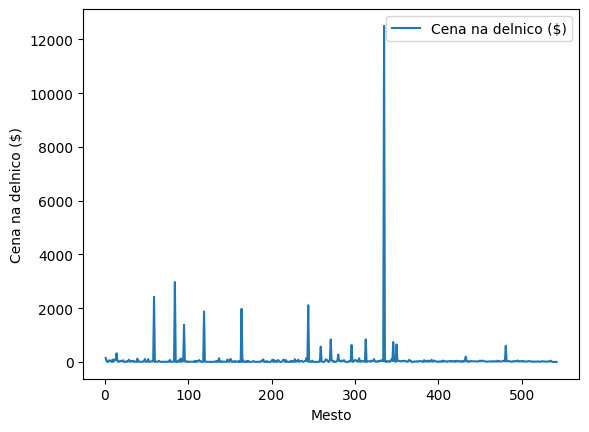

In [6]:
banke[["Mesto", "Cena na delnico ($)"]].groupby("Mesto").mean().plot(ylabel="Cena na delnico ($)")

V Nebraski izgleda, da so delnice kar malo dražje kot drugod po svetu.

### Porazdelitev bank

Poglejmo si, kje se nahajajo največje banke na svetu.

<Axes: xlabel='Država'>

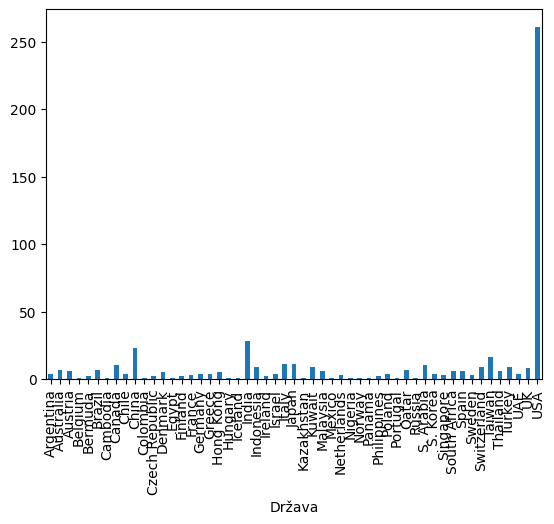

In [7]:
banke.groupby("Država").size().plot.bar()

Ker deluje vse skupaj nepregledno, si poglejmo zastopanost 10 najpogostejših držav.

<Axes: xlabel='Država'>

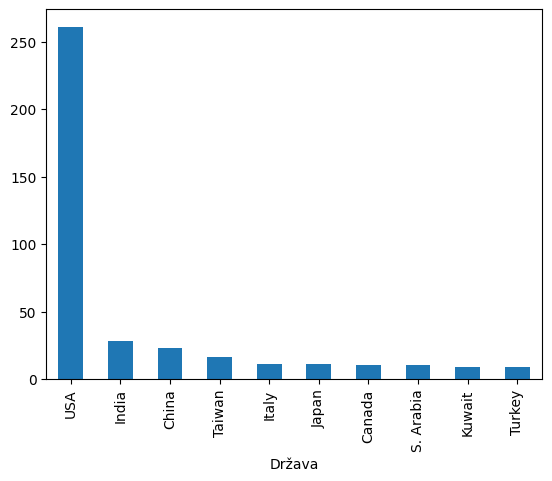

In [8]:
banke.groupby("Država").size().sort_values(ascending=False).head(10).plot.bar()

Zelo hitro postane očitno, da je Amerika velesila tudi po številu bank. Vseeno je verjetno najlažje, da si ogledamo porazdelitev kar v številkah.



In [9]:
banke["Država"].value_counts()

Država
USA               261
India              28
China              23
Taiwan             16
Japan              11
Italy              11
Canada             10
S. Arabia          10
Kuwait              9
Indonesia           9
Turkey              9
Switzerland         9
UK                  8
Brazil              7
Australia           7
Qatar               7
Spain               6
Thailand            6
Austria             6
South Africa        6
Malaysia            6
Denmark             5
Hong Kong           5
Germany             4
Argentina           4
UAE                 4
S. Korea            4
Greece              4
Israel              4
Chile               4
Poland              4
Singapore           3
Sweden              3
France              3
Netherlands         3
Bermuda             2
Ireland             2
Philippines         2
Czech Republic      2
Finland             2
Iceland             1
Belgium             1
Panama              1
Cambodia            1
Nigeria             1
Nor

Ali pa je zares Amerika glede na banke tako bogatejša kot ostal svet? Poglejmo si vsote skupnih tržnih kapitalizacij glede na državo izvora.

### Tržna kapitalizacija držav

In [10]:
drzavne_banke = banke.groupby("Država")["Tržna kapitalizacija (milijarde $)"].sum().sort_values(ascending=False)
drzavne_banke

Država
USA               1891.4735
China             1184.7200
India              551.1100
Canada             420.1000
Australia          310.7000
Japan              288.5200
UK                 269.6300
S. Arabia          239.2700
Brazil             188.0100
Indonesia          185.3400
Taiwan             168.1700
Spain              155.9400
Singapore          136.4000
France             135.2900
Italy              134.6000
Switzerland        118.5300
Kuwait              80.4300
Malaysia            77.9200
Qatar               74.6100
UAE                 69.1700
Netherlands         64.8700
Sweden              59.9300
South Africa        58.7600
Hong Kong           57.3900
Turkey              45.8800
Thailand            43.8300
Finland             39.8700
Germany             38.9100
Israel              36.3400
S. Korea            36.3000
Denmark             33.3400
Poland              31.7500
Austria             27.3500
Chile               26.4800
Ireland             22.4800
Greece       

Kitajska ima več kot 200 bank manj na seznamu, skupna tržna kapitalizacija pa ni od ameriške manjša niti za polovico.

<Axes: ylabel='Tržna kapitalizacija (milijarde $)'>

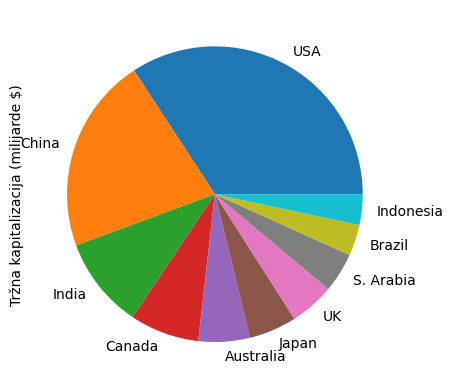

In [18]:
drzavne_banke.head(10).plot.pie()

Tudi na tortnem diagramu premoč Amerike ne izgleda več tako očitna kot na zgornjem grafu zastopanosti.

### Povprečna cena delnice glede na državo

In [12]:
povprecje = banke.groupby("Država")["Cena na delnico ($)"].mean().sort_values(ascending=False)
povprecje

Država
Kuwait            1463.750000
Belgium            598.870000
Japan              187.895455
Switzerland        134.475556
USA                 85.100969
Bermuda             83.305000
Denmark             61.746000
Poland              57.187500
Canada              50.525000
Hungary             40.030000
Austria             37.415000
France              34.533333
Australia           33.198571
Colombia            27.300000
South Africa        27.051667
Panama              23.540000
Israel              22.967500
S. Korea            22.727500
Netherlands         20.530000
Czech Republic      18.120000
Chile               17.940000
Singapore           17.793333
Germany             16.277500
Kazakhstan          14.700000
UK                  14.678750
Philippines         12.875000
Sweden              12.366667
Norway              12.230000
Argentina           11.087500
Italy               10.658182
Finland             10.455000
S. Arabia            9.364000
India                7.793571
Ire

Že iz zgornjih tabel smo kar uspešno sklepali, da so delnice najdražje v Kuvajtu, zelo poceni pa jih lahko dobimo v Indoneziji.

Zelo okorno in verjetno bolj malo realno, lahko izračunamo število vseh bančnih delnic v posameznih državah.

In [16]:
število_delnic = (drzavne_banke * 10 ** 9 / povprecje).sort_values(ascending=False)
število_delnic

Država
China             9.861947e+11
Indonesia         6.132574e+11
Taiwan            2.044620e+11
India             7.071341e+10
Turkey            3.947610e+10
Spain             3.806509e+10
Brazil            3.475231e+10
Qatar             3.172965e+10
UAE               3.077642e+10
Malaysia          2.819783e+10
S. Arabia         2.555211e+10
USA               2.222623e+10
UK                1.836873e+10
Thailand          1.733553e+10
Portugal          1.503704e+10
Hong Kong         1.478362e+10
Italy             1.262880e+10
Australia         9.358836e+09
Canada            8.314696e+09
Singapore         7.665792e+09
Greece            6.012978e+09
Sweden            4.846092e+09
Egypt             4.226087e+09
France            3.917664e+09
Finland           3.813486e+09
Netherlands       3.159766e+09
Ireland           3.081563e+09
Germany           2.390416e+09
South Africa      2.172140e+09
S. Korea          1.597184e+09
Israel            1.582236e+09
Japan             1.535535e+09
C

Za predstavo še graf števila delnic glede na državo.

<Axes: >

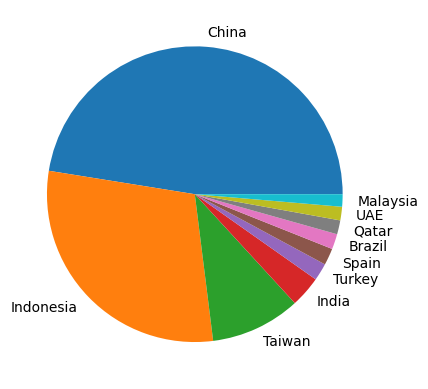

In [17]:
število_delnic.head(10).plot.pie()

Po grafu (in okornemu izračunu) izgleda, da je trg bančnih delnic najbolj pogost v Aziji.